# Data Preparation - LMA Features Data

### Note: Datasets follow the format preprocess_datasetname
So we have, for example: Fs_B_dataset1.csv -> Dataset was first Feature Selected and then Balanced

Fs - Feature Selected

B - Balanced

N - Normalized

S - Standardized

## Imports

In [1]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import joblib
from collections import Counter
import numpy as np

### Load Dataset

In [2]:
data = pd.read_csv('datasets/BANDAI_05sec.csv')

In [3]:
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,0.433596,0.158604,0.262368,0.538619,0.204290,0.286321,0.174445,0.107800,0.236151,0.223894,...,0.544719,0.747464,0.783573,2.388999,2.320488,1.089438,1.494928,0.05,-0.4,0.0
1,0.502380,0.348371,0.141433,0.355769,0.308451,0.226158,0.114087,0.185519,0.236151,0.223894,...,0.375438,0.813410,1.279194,1.685722,0.708942,0.661071,0.783065,0.05,-0.4,0.0
2,0.523859,0.430275,0.176769,0.588712,0.337860,0.209359,0.111133,0.249847,0.236151,0.223894,...,0.343913,0.897555,0.762036,0.337886,0.417700,0.325002,0.209341,0.05,-0.4,0.0
3,0.506404,0.372590,0.182689,0.671607,0.304908,0.199841,0.092428,0.244035,0.236151,0.223894,...,1.118295,0.912977,1.376315,0.773128,0.324001,1.594570,0.748233,0.05,-0.4,0.0
4,0.399879,0.189986,0.280258,0.595205,0.236768,0.250473,0.108253,0.145548,0.236151,0.223894,...,1.306542,0.828419,0.436481,0.562979,1.256880,0.433401,0.184292,0.05,-0.4,0.0


## Feature Selection

In [4]:
data = pd.read_csv('datasets/BANDAI_05sec.csv')

In [5]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.433596,0.158604,0.262368,0.538619,0.204290,0.286321,0.174445,0.107800,0.236151,0.223894,...,0.391787,1.194499,1.160244,0.544719,0.747464,0.783573,2.388999,2.320488,1.089438,1.494928
1,0.502380,0.348371,0.141433,0.355769,0.308451,0.226158,0.114087,0.185519,0.236151,0.223894,...,0.807009,1.046016,1.007270,0.375438,0.813410,1.279194,1.685722,0.708942,0.661071,0.783065
2,0.523859,0.430275,0.176769,0.588712,0.337860,0.209359,0.111133,0.249847,0.236151,0.223894,...,0.989961,0.908436,1.027262,0.343913,0.897555,0.762036,0.337886,0.417700,0.325002,0.209341
3,0.506404,0.372590,0.182689,0.671607,0.304908,0.199841,0.092428,0.244035,0.236151,0.223894,...,1.082582,0.689009,1.158406,1.118295,0.912977,1.376315,0.773128,0.324001,1.594570,0.748233
4,0.399879,0.189986,0.280258,0.595205,0.236768,0.250473,0.108253,0.145548,0.236151,0.223894,...,1.172738,0.480506,0.535663,1.306542,0.828419,0.436481,0.562979,1.256880,0.433401,0.184292


### Variance Analysis

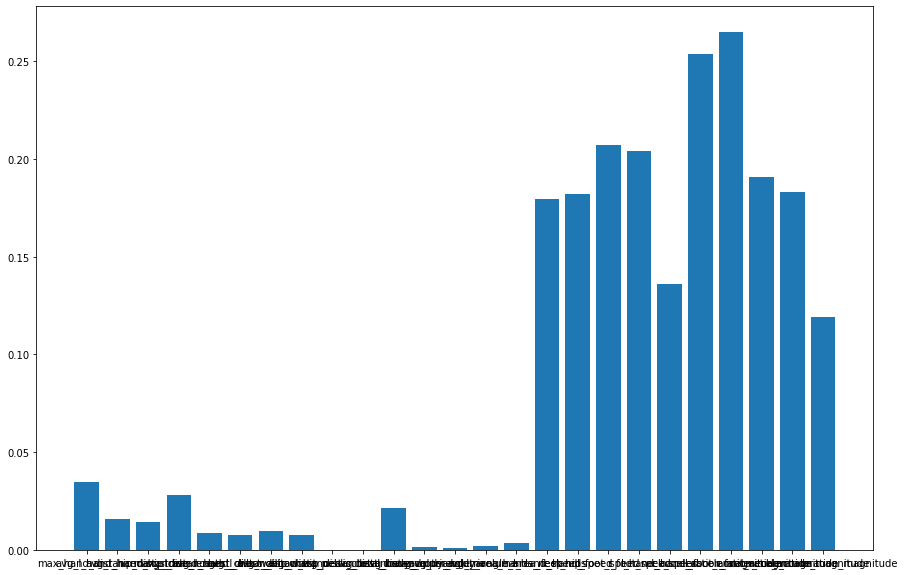

max_hand_distance  -  0.03491304733644578
avg_l_hand_hip_distance  -  0.015868281287816956
avg_r_hand_hip_distance  -  0.014470554404917197
max_stride_length  -  0.028326866850222364
avg_l_hand_chest_distance  -  0.008806980415674723
avg_r_hand_chest_distance  -  0.007524396751399415
avg_l_elbow_hip_distance  -  0.009428897483786723
avg_r_elbow_hip_distance  -  0.007645592871625331
avg_chest_pelvis_distance  -  6.060942455585641e-16
avg_neck_chest_distance  -  8.251987887671059e-16
avg_total_body_volume  -  0.02126605667388229
avg_lower_body_volume  -  0.0012868425380496526
avg_upper_body_volume  -  0.0008923110730820687
avg_triangle_area_hands_neck  -  0.001767042477456042
avg_triangle_area_feet_hips  -  0.003674808241390709
l_hand_speed  -  0.17967173410709683
r_hand_speed  -  0.18190320702039542
l_foot_speed  -  0.20693281681638995
r_foot_speed  -  0.2040053348480265
neck_speed  -  0.13585843176626808
l_hand_acceleration_magnitude  -  0.253664206475688
r_hand_acceleration_magnitude 

In [6]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [7]:
data = pd.read_csv('datasets/BANDAI_05sec.csv')

In [8]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.433596,0.158604,0.262368,0.538619,0.204290,0.286321,0.174445,0.107800,0.236151,0.223894,...,0.391787,1.194499,1.160244,0.544719,0.747464,0.783573,2.388999,2.320488,1.089438,1.494928
1,0.502380,0.348371,0.141433,0.355769,0.308451,0.226158,0.114087,0.185519,0.236151,0.223894,...,0.807009,1.046016,1.007270,0.375438,0.813410,1.279194,1.685722,0.708942,0.661071,0.783065
2,0.523859,0.430275,0.176769,0.588712,0.337860,0.209359,0.111133,0.249847,0.236151,0.223894,...,0.989961,0.908436,1.027262,0.343913,0.897555,0.762036,0.337886,0.417700,0.325002,0.209341
3,0.506404,0.372590,0.182689,0.671607,0.304908,0.199841,0.092428,0.244035,0.236151,0.223894,...,1.082582,0.689009,1.158406,1.118295,0.912977,1.376315,0.773128,0.324001,1.594570,0.748233
4,0.399879,0.189986,0.280258,0.595205,0.236768,0.250473,0.108253,0.145548,0.236151,0.223894,...,1.172738,0.480506,0.535663,1.306542,0.828419,0.436481,0.562979,1.256880,0.433401,0.184292


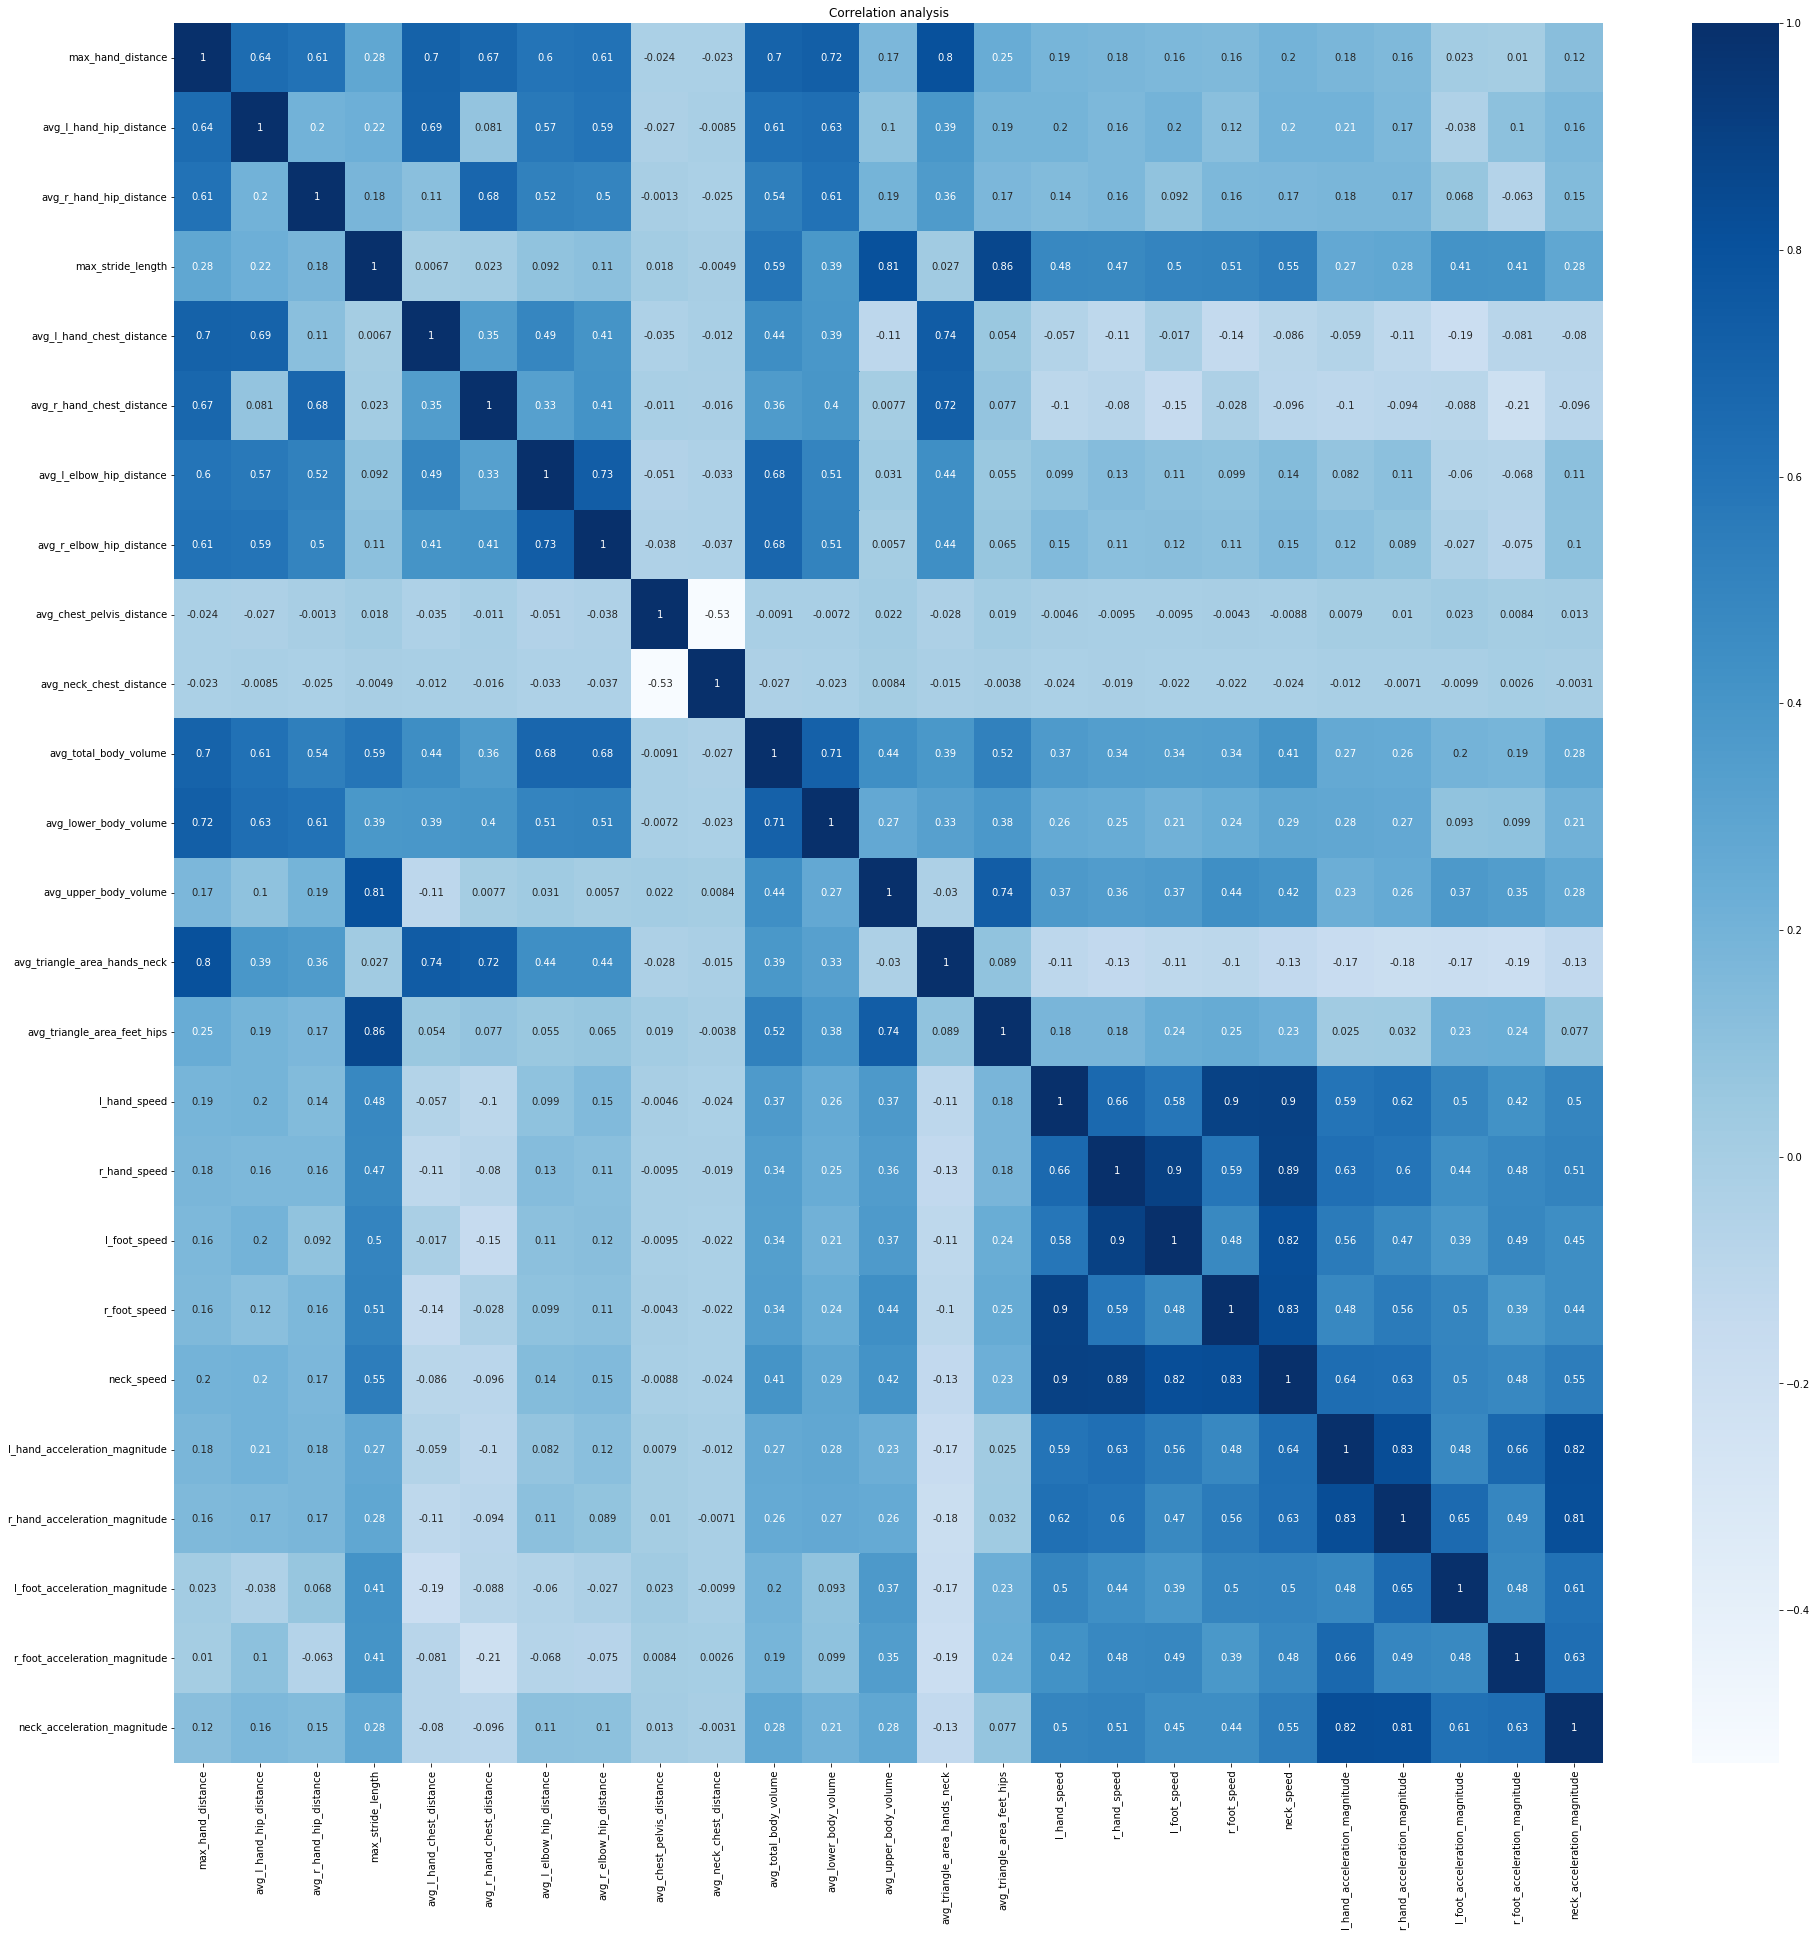

In [9]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [10]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [11]:
df = pd.read_csv('datasets/BANDAI_05sec.csv')

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.352025
avg_l_hand_hip_distance          0.159650
avg_r_hand_hip_distance          0.109480
max_stride_length                0.259324
avg_l_hand_chest_distance        0.181463
avg_r_hand_chest_distance        0.169750
avg_l_elbow_hip_distance         0.005236
avg_r_elbow_hip_distance         0.018723
avg_chest_pelvis_distance        0.026308
avg_neck_chest_distance          0.002237
avg_total_body_volume            0.252873
avg_lower_body_volume            0.338608
avg_upper_body_volume            0.193288
avg_triangle_area_hands_neck     0.198718
avg_triangle_area_feet_hips      0.204746
l_hand_speed                     0.172030
r_hand_speed                     0.165799
l_foot_speed                     0.147955
r_foot_speed                     0.147250
neck_speed                       0.178950
l_hand_acceleration_magnitude    0.188373
r_hand_acceleration_magnitude    0.168029
l_foot_acceleration_ma

## Outliers

In [12]:
from scipy import stats

In [18]:
data = pd.read_csv('datasets/BANDAI_5frame.csv')
print(data.shape)

(78551, 28)


In [19]:
data.iloc[0]

max_hand_distance                0.433596
avg_l_hand_hip_distance          0.130036
avg_r_hand_hip_distance          0.335475
max_stride_length                0.538619
avg_l_hand_chest_distance        0.184473
avg_r_hand_chest_distance        0.310089
avg_l_elbow_hip_distance         0.210679
avg_r_elbow_hip_distance         0.093915
avg_chest_pelvis_distance        0.236151
avg_neck_chest_distance          0.223894
avg_total_body_volume            0.247232
avg_lower_body_volume            0.079520
avg_upper_body_volume            0.108071
avg_triangle_area_hands_neck     0.070847
avg_triangle_area_feet_hips      0.176692
l_hand_speed                    -0.092920
r_hand_speed                    -0.196129
l_foot_speed                    -0.221155
r_foot_speed                    -0.137483
neck_speed                      -0.139467
l_hand_acceleration_magnitude    0.092920
r_hand_acceleration_magnitude    0.196129
l_foot_acceleration_magnitude    0.221155
r_foot_acceleration_magnitude    0

In [20]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.shape

(71834, 28)

In [21]:
data.iloc[0]

max_hand_distance                0.348051
avg_l_hand_hip_distance          0.145184
avg_r_hand_hip_distance          0.256784
max_stride_length                0.455501
avg_l_hand_chest_distance        0.197954
avg_r_hand_chest_distance        0.284215
avg_l_elbow_hip_distance         0.172405
avg_r_elbow_hip_distance         0.104876
avg_chest_pelvis_distance        0.236151
avg_neck_chest_distance          0.223894
avg_total_body_volume            0.213422
avg_lower_body_volume            0.060301
avg_upper_body_volume            0.095905
avg_triangle_area_hands_neck     0.062156
avg_triangle_area_feet_hips      0.140964
l_hand_speed                    -0.048761
r_hand_speed                    -0.165199
l_foot_speed                    -0.153981
r_foot_speed                    -0.072441
neck_speed                      -0.095084
l_hand_acceleration_magnitude    0.048935
r_hand_acceleration_magnitude    0.032804
l_foot_acceleration_magnitude    0.070625
r_foot_acceleration_magnitude    0

In [22]:
data.to_csv(r'datasets/O_BANDAI_5frame.csv', index = False)